# Experimento 2: classificação com KNN

Experimentando 30 rodadas de classificação com KNN com

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (classification_report,
                             plot_confusion_matrix,
                             confusion_matrix,
                             accuracy_score)

In [2]:
def acuracia_por_frequencia(
        frequence:np.ndarray,
        y_true:np.ndarray,
        y_pred:np.ndarray,
        rodada : int = 0
    )->pd.DataFrame:
    
    df = pd.DataFrame(
        data=[frequence, y_true, y_pred],
        index=['freq', 'true', 'pred']
        ).transpose()

    score_dict = {}

    for freq, sub_df in df.groupby('freq'):
        score_dict[f'freq_{freq}_support'] = len(sub_df)
        score_dict[f'freq_{freq}_acc'] = accuracy_score(y_true=sub_df['true'].values,
                                                        y_pred=sub_df['pred'].values)
    return pd.DataFrame(score_dict, index=[rodada])


## Carregando dados

seeds: [3085 3578  901 4488 5199 4336 4402 7644 6886 4771 2685 4579 4654  662
 3965 6738 6761 7949 4014 1873 2123 2380 2332 5280 3989 2127 6571 6020
 3453 2671]
Rodada: 0 - seed: 3085

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98        71
        HI-1       0.99      0.97      0.98        72
        HI-2       0.97      0.99      0.98        70
        HI-3       0.99      1.00      0.99        71
        LI-1       0.98      0.98      0.98        86
        LI-2       0.97      1.00      0.99        75
        LI-3       1.00      1.00      1.00        74

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



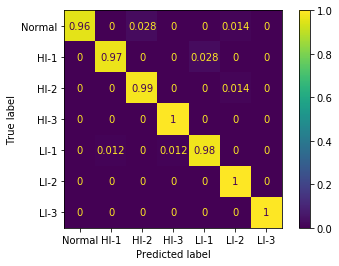

Rodada: 1 - seed: 3578

              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98        68
        HI-1       0.96      0.96      0.96        72
        HI-2       0.99      0.97      0.98        80
        HI-3       0.99      1.00      0.99        84
        LI-1       0.95      0.95      0.95        63
        LI-2       0.99      1.00      0.99        75
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



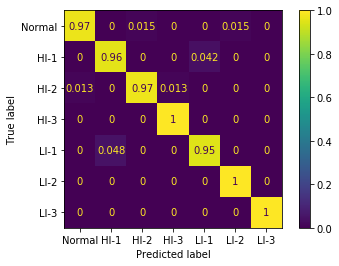

Rodada: 2 - seed: 901

              precision    recall  f1-score   support

      Normal       0.97      0.97      0.97        66
        HI-1       0.90      0.96      0.93        77
        HI-2       0.99      0.96      0.98        83
        HI-3       0.97      0.96      0.97        74
        LI-1       0.97      0.95      0.96        81
        LI-2       1.00      1.00      1.00        71
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



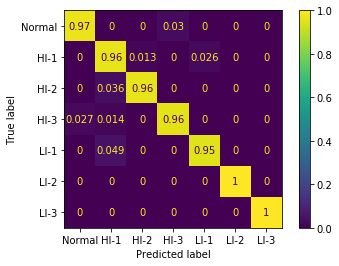

Rodada: 3 - seed: 4488

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        85
        HI-1       0.97      0.95      0.96        66
        HI-2       1.00      1.00      1.00        80
        HI-3       1.00      1.00      1.00        68
        LI-1       0.95      0.97      0.96        65
        LI-2       1.00      1.00      1.00        87
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



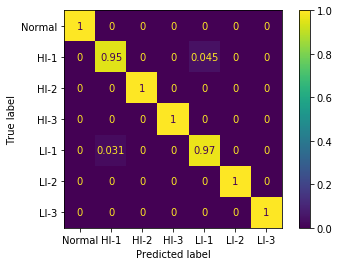

Rodada: 4 - seed: 5199

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        61
        HI-1       0.96      0.97      0.97        71
        HI-2       1.00      0.98      0.99        82
        HI-3       1.00      1.00      1.00        79
        LI-1       0.97      0.96      0.97        81
        LI-2       0.97      1.00      0.99        77
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



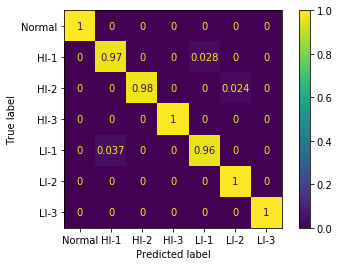

Rodada: 5 - seed: 4336

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99        84
        HI-1       0.96      0.97      0.97        78
        HI-2       0.97      0.95      0.96        65
        HI-3       1.00      0.99      0.99        67
        LI-1       0.97      0.97      0.97        67
        LI-2       0.99      1.00      0.99        74
        LI-3       1.00      1.00      1.00        84

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



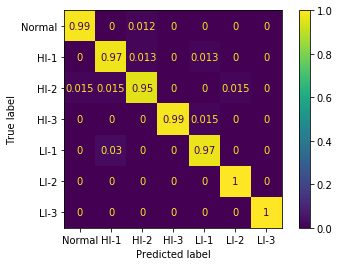

Rodada: 6 - seed: 4402

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99        74
        HI-1       0.95      0.96      0.96        80
        HI-2       0.98      0.97      0.98        64
        HI-3       1.00      1.00      1.00        71
        LI-1       0.96      0.96      0.96        78
        LI-2       0.99      1.00      0.99        75
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



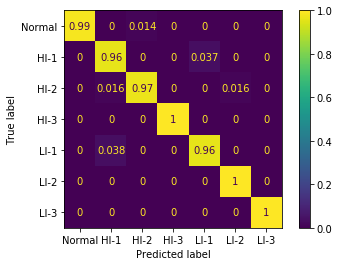

Rodada: 7 - seed: 7644

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        70
        HI-1       0.95      0.97      0.96        90
        HI-2       1.00      0.97      0.99        69
        HI-3       0.98      0.99      0.98        91
        LI-1       0.95      0.92      0.94        66
        LI-2       1.00      1.00      1.00        65
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



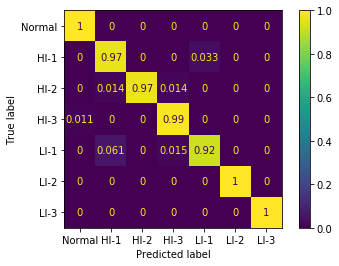

Rodada: 8 - seed: 6886

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99        71
        HI-1       0.93      0.97      0.95        71
        HI-2       1.00      0.97      0.99        78
        HI-3       0.99      0.99      0.99        80
        LI-1       0.96      0.96      0.96        70
        LI-2       1.00      1.00      1.00        78
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



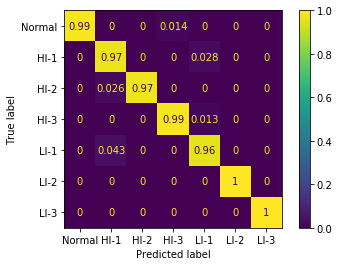

Rodada: 9 - seed: 4771

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99        71
        HI-1       0.95      0.98      0.97        64
        HI-2       0.99      0.99      0.99        90
        HI-3       1.00      0.98      0.99        83
        LI-1       0.97      0.97      0.97        71
        LI-2       1.00      0.97      0.98        67
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



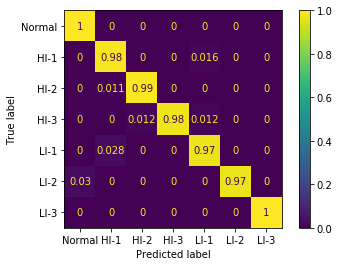

Rodada: 10 - seed: 2685

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99        70
        HI-1       0.91      0.96      0.94        78
        HI-2       0.97      0.98      0.98        64
        HI-3       1.00      0.97      0.98        65
        LI-1       0.95      0.92      0.93        77
        LI-2       1.00      0.99      0.99        83
        LI-3       1.00      1.00      1.00        82

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



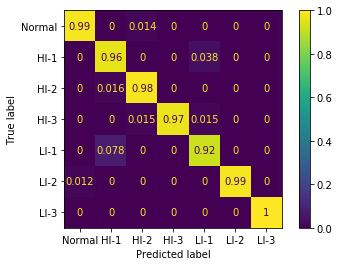

Rodada: 11 - seed: 4579

              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98        88
        HI-1       0.95      0.96      0.96        79
        HI-2       0.99      0.97      0.98        76
        HI-3       1.00      0.99      0.99        82
        LI-1       0.95      0.95      0.95        78
        LI-2       0.96      1.00      0.98        55
        LI-3       1.00      1.00      1.00        61

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



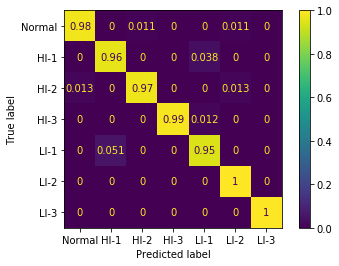

Rodada: 12 - seed: 4654

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99        74
        HI-1       0.90      0.91      0.90        67
        HI-2       0.99      0.96      0.97        79
        HI-3       0.99      0.96      0.98        82
        LI-1       0.93      0.95      0.94        75
        LI-2       1.00      1.00      1.00        75
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.97       519
   macro avg       0.97      0.97      0.97       519
weighted avg       0.97      0.97      0.97       519



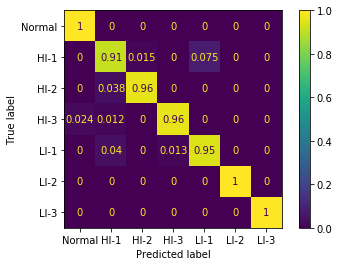

Rodada: 13 - seed: 662

              precision    recall  f1-score   support

      Normal       0.98      1.00      0.99        61
        HI-1       0.93      0.96      0.95        73
        HI-2       0.99      0.96      0.97        71
        HI-3       0.99      0.96      0.97        77
        LI-1       0.95      0.95      0.95        87
        LI-2       0.99      1.00      0.99        78
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.97       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.97      0.97       519



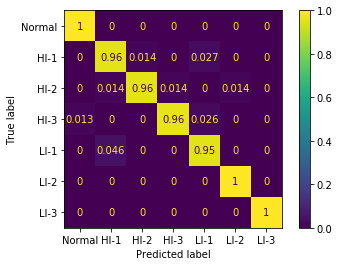

Rodada: 14 - seed: 3965

              precision    recall  f1-score   support

      Normal       0.97      0.98      0.98        62
        HI-1       0.96      0.96      0.96        72
        HI-2       0.99      0.99      0.99        86
        HI-3       0.99      0.95      0.97        79
        LI-1       0.95      0.97      0.96        80
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



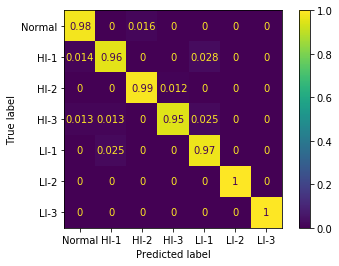

Rodada: 15 - seed: 6738

              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98        58
        HI-1       0.93      0.97      0.95        79
        HI-2       0.97      0.97      0.97        74
        HI-3       0.96      0.99      0.97        67
        LI-1       0.99      0.93      0.96        85
        LI-2       0.99      1.00      0.99        75
        LI-3       1.00      1.00      1.00        81

    accuracy                           0.97       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.97      0.97       519



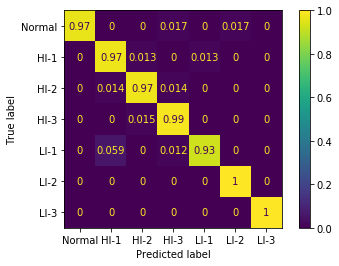

Rodada: 16 - seed: 6761

              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98        55
        HI-1       0.95      1.00      0.98        79
        HI-2       1.00      0.98      0.99        82
        HI-3       0.98      1.00      0.99        86
        LI-1       1.00      0.93      0.97        76
        LI-2       0.96      1.00      0.98        72
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



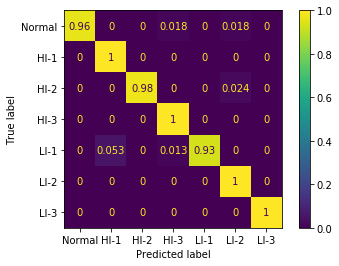

Rodada: 17 - seed: 7949

              precision    recall  f1-score   support

      Normal       0.95      1.00      0.97        69
        HI-1       0.96      0.97      0.96        69
        HI-2       1.00      1.00      1.00        68
        HI-3       0.99      0.99      0.99        75
        LI-1       0.97      0.95      0.96        75
        LI-2       1.00      0.96      0.98        83
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



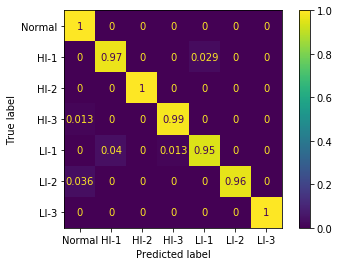

Rodada: 18 - seed: 4014

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        70
        HI-1       0.96      0.98      0.97        82
        HI-2       0.99      0.99      0.99        88
        HI-3       0.99      0.99      0.99        73
        LI-1       0.98      0.96      0.97        83
        LI-2       1.00      1.00      1.00        56
        LI-3       1.00      1.00      1.00        67

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



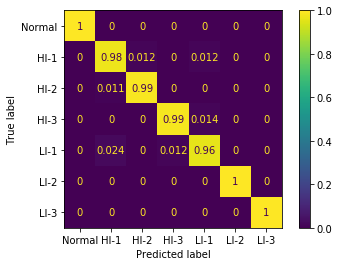

Rodada: 19 - seed: 1873

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99        75
        HI-1       0.97      0.98      0.97        85
        HI-2       0.99      1.00      0.99        75
        HI-3       1.00      0.99      0.99        77
        LI-1       0.96      0.96      0.96        68
        LI-2       1.00      1.00      1.00        71
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



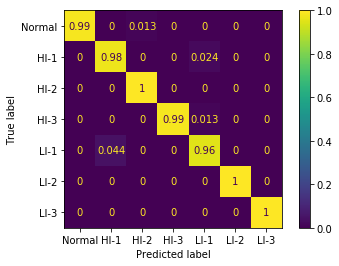

Rodada: 20 - seed: 2123

              precision    recall  f1-score   support

      Normal       0.99      0.99      0.99        72
        HI-1       0.97      0.93      0.95        81
        HI-2       0.99      0.99      0.99        81
        HI-3       0.94      0.95      0.95        64
        LI-1       0.96      0.97      0.97        77
        LI-2       0.97      1.00      0.99        68
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.97       519
   macro avg       0.97      0.98      0.97       519
weighted avg       0.98      0.97      0.97       519



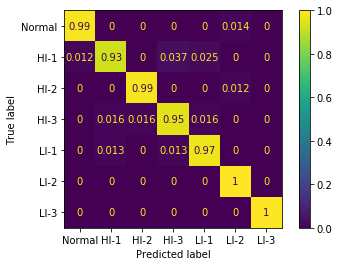

Rodada: 21 - seed: 2380

              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98        71
        HI-1       0.97      0.99      0.98        70
        HI-2       0.96      0.99      0.97        75
        HI-3       1.00      0.97      0.98        91
        LI-1       0.97      0.99      0.98        69
        LI-2       1.00      1.00      1.00        63
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.98       519
   macro avg       0.98      0.99      0.98       519
weighted avg       0.98      0.98      0.98       519



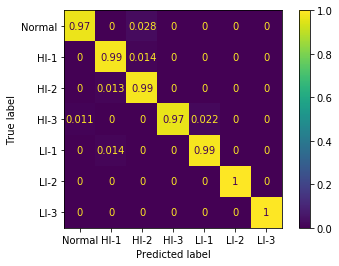

Rodada: 22 - seed: 2332

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        70
        HI-1       0.96      0.96      0.96        70
        HI-2       0.99      1.00      0.99        70
        HI-3       0.99      0.99      0.99        82
        LI-1       0.97      0.95      0.96        75
        LI-2       1.00      1.00      1.00        72
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



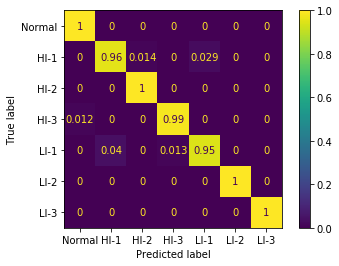

Rodada: 23 - seed: 5280

              precision    recall  f1-score   support

      Normal       0.99      1.00      0.99        73
        HI-1       0.95      0.99      0.97        71
        HI-2       0.99      0.99      0.99        73
        HI-3       1.00      0.99      0.99        74
        LI-1       0.99      0.95      0.97        76
        LI-2       1.00      1.00      1.00        73
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.99       519
   macro avg       0.99      0.99      0.99       519
weighted avg       0.99      0.99      0.99       519



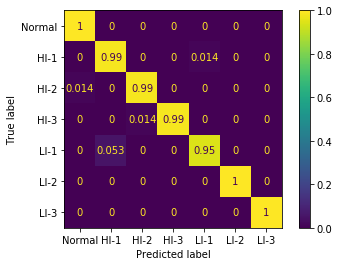

Rodada: 24 - seed: 3989

              precision    recall  f1-score   support

      Normal       0.97      1.00      0.98        58
        HI-1       0.96      0.99      0.97        71
        HI-2       1.00      0.98      0.99        83
        HI-3       0.97      0.97      0.97        77
        LI-1       0.99      0.95      0.97        79
        LI-2       0.99      1.00      0.99        74
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



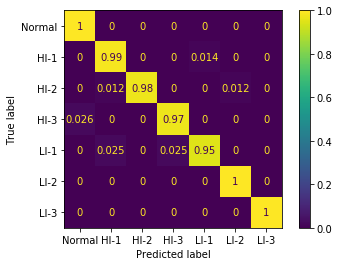

Rodada: 25 - seed: 2127

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        76
        HI-1       0.96      0.94      0.95        77
        HI-2       1.00      0.97      0.99        71
        HI-3       0.99      0.99      0.99        72
        LI-1       0.94      0.99      0.97        84
        LI-2       1.00      1.00      1.00        81
        LI-3       1.00      1.00      1.00        58

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



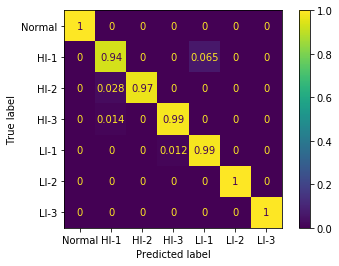

Rodada: 26 - seed: 6571

              precision    recall  f1-score   support

      Normal       1.00      0.99      0.99        69
        HI-1       0.96      0.97      0.97        78
        HI-2       0.98      0.98      0.98        65
        HI-3       0.99      0.97      0.98        72
        LI-1       0.95      0.96      0.96        81
        LI-2       1.00      1.00      1.00        77
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



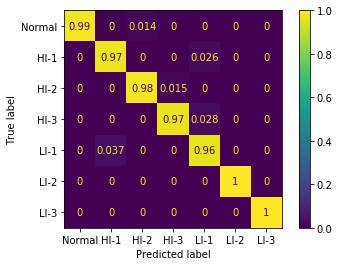

Rodada: 27 - seed: 6020

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        71
        HI-1       0.94      0.97      0.95        87
        HI-2       1.00      0.97      0.98        66
        HI-3       0.99      0.99      0.99        72
        LI-1       0.95      0.95      0.95        73
        LI-2       1.00      1.00      1.00        81
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



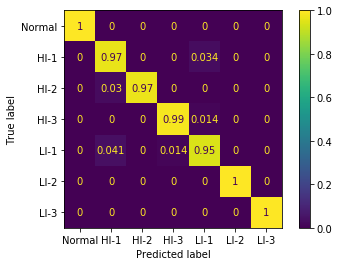

Rodada: 28 - seed: 3453

              precision    recall  f1-score   support

      Normal       0.93      0.99      0.96        67
        HI-1       0.91      0.91      0.91        68
        HI-2       1.00      0.94      0.97        85
        HI-3       0.97      0.95      0.96        79
        LI-1       0.89      0.93      0.91        69
        LI-2       1.00      1.00      1.00        72
        LI-3       1.00      1.00      1.00        79

    accuracy                           0.96       519
   macro avg       0.96      0.96      0.96       519
weighted avg       0.96      0.96      0.96       519



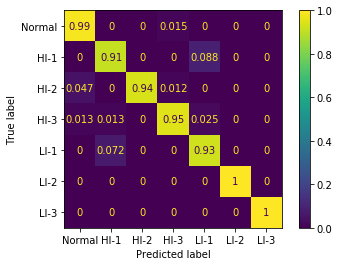

Rodada: 29 - seed: 2671

              precision    recall  f1-score   support

      Normal       1.00      0.98      0.99        66
        HI-1       0.93      0.97      0.95        86
        HI-2       0.97      0.97      0.97        79
        HI-3       1.00      0.95      0.98        65
        LI-1       0.95      0.96      0.95        76
        LI-2       1.00      1.00      1.00        69
        LI-3       1.00      1.00      1.00        78

    accuracy                           0.98       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.98      0.98      0.98       519



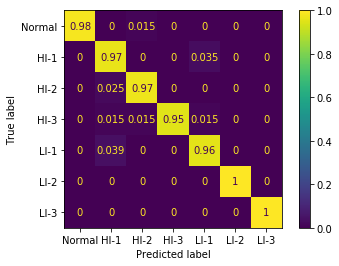

In [3]:
TARGET_LABELS = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')

fluxo_df = pd.read_csv('./csvs/fs13.csv')
y = fluxo_df.pop('target').values
X = fluxo_df.values

acc_scores = []
freq_scores_df = []
confusion_matrices = []

for rodada, seed in enumerate(random_seeds):
    # Distribuindo os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Instanciando e treinando classificador
    classifier = make_pipeline(
        StandardScaler(),
        KNeighborsClassifier(n_neighbors=1)
        ).fit(
            X_train,
            y_train)

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Adicionando resultados à respectiva lista
    acc_scores.append(
        classifier.score(X_test, y_test))

    freq_scores_df.append(
        acuracia_por_frequencia(
            frequence=X_test[:, -1],
            y_pred=y_pred,
            y_true=y_test,
            rodada=rodada))

    confusion_matrices.append(
        confusion_matrix(
            y_pred=y_pred,
            y_true=y_test,
            normalize='true'))

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed}\n')

    print(classification_report(y_test, y_pred, target_names=TARGET_LABELS))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        normalize='true',
        display_labels=TARGET_LABELS
    )
    plt.show()

## Matriz de confusão média

[[9.87819320e-01 0.00000000e+00 6.04060570e-03 3.15787027e-03
  0.00000000e+00 2.98220374e-03 0.00000000e+00]
 [8.74485597e-04 9.63972205e-01 3.59521025e-03 1.23456790e-03
  3.03235317e-02 0.00000000e+00 0.00000000e+00]
 [3.39333213e-03 1.06710150e-02 9.77966316e-01 3.11226675e-03
  0.00000000e+00 4.85706970e-03 0.00000000e+00]
 [5.44004143e-03 3.19745318e-03 2.89604367e-03 9.79633122e-01
  8.83333959e-03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.90576301e-02 0.00000000e+00 5.58856921e-03
  9.55353801e-01 0.00000000e+00 0.00000000e+00]
 [2.60145058e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.97398549e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]]


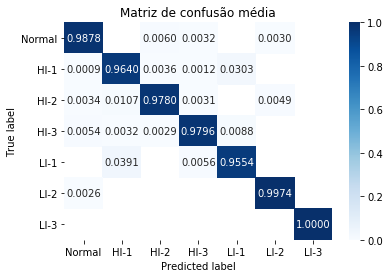

[[0.01285691 0.         0.00864806 0.00745675 0.         0.00604899
  0.        ]
 [0.00327809 0.02011898 0.00597996 0.00664835 0.01895565 0.
  0.        ]
 [0.00935024 0.01188005 0.01389912 0.00567743 0.         0.00782309
  0.        ]
 [0.00850355 0.00582756 0.00582077 0.01601403 0.00967802 0.
  0.        ]
 [0.         0.01705483 0.         0.00720372 0.01691947 0.
  0.        ]
 [0.00844518 0.         0.         0.         0.         0.00844518
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


[Text(33.0, 0.5, 'True label'),
 Text(0.5, 15.0, 'Predicted label'),
 Text(0.5, 1, 'Desvio padrão da matriz de confusão')]

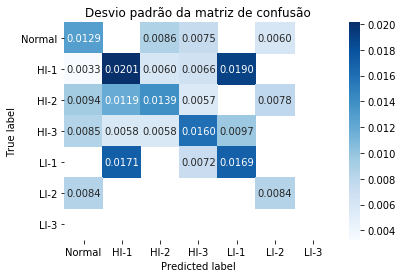

In [4]:
confusion_matrix_mean = np.mean(confusion_matrices, axis=0)
confusion_matrix_std = np.std(confusion_matrices, axis=0)

print(confusion_matrix_mean)
sns.heatmap(
    data=confusion_matrix_mean,
    cmap='Blues',
    vmin=0,
    vmax=1,
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_mean == 0,
    xticklabels=TARGET_LABELS,
    yticklabels=TARGET_LABELS
    ).set(
        title='Matriz de confusão média',
        xlabel='Predicted label',
        ylabel='True label')

plt.show()

print(confusion_matrix_std)
sns.heatmap(
    data=confusion_matrix_std,
    cmap='Blues',
    annot=True,
    fmt='.4f',
    mask=confusion_matrix_std == 0,
    xticklabels=TARGET_LABELS,
    yticklabels=TARGET_LABELS
    ).set(
        title='Desvio padrão da matriz de confusão',
        xlabel='Predicted label',
        ylabel='True label')

## Acurácias gerais

count    30.000000
mean      0.980154
std       0.006363
min       0.959538
25%       0.976879
50%       0.982659
75%       0.984586
max       0.990366
Name: Acurácia, dtype: float64


Acurácia
0.984586
0.980732
0.971098
0.990366
0.986513
0.982659
0.982659
0.978805
0.982659
0.984586


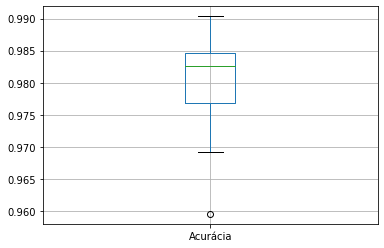

In [5]:
acc_s = pd.Series(data=acc_scores, name='Acurácia')

acc_s.to_frame().boxplot()

print(acc_s.describe())

acc_s.to_frame().style.hide_index().background_gradient(cmap='Blues')

## Acurácias e distribuição de amostras por frequência

In [6]:
freq_df = pd.concat(freq_scores_df, ignore_index=True)

acc_columns = [col for col in freq_df.columns if 'acc' in col]
sup_columns = [col for col in freq_df.columns if 'support' in col]

freq_accs = freq_df[acc_columns]
freq_sups = freq_df[sup_columns]

freq_accs.style.hide_index()

freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
0.974359,0.984127,0.987013,0.972222,0.985507,1.000000,0.987342
0.987342,0.985294,0.987179,0.971014,0.982143,0.987500,0.966292
0.913043,1.000000,0.986111,1.000000,1.000000,0.941860,0.950000
0.985507,1.000000,0.973684,1.000000,1.000000,1.000000,0.971014
0.962963,1.000000,0.986486,0.982759,1.000000,1.000000,0.967742
0.962963,1.000000,1.000000,0.984615,1.000000,0.988372,0.952941
0.943662,1.000000,0.974026,0.972973,1.000000,1.000000,0.987179
0.969231,1.000000,0.972222,0.985294,0.988372,0.987952,0.944444
0.933333,1.000000,1.000000,1.000000,0.984375,1.000000,0.962963
0.971429,1.000000,0.987013,1.000000,1.000000,0.984848,0.951807


,freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.964586,0.997928,0.990339,0.985272,0.988052,0.981531,0.953124
std,0.022822,0.005382,0.010780,0.013937,0.013989,0.020161,0.019918
min,0.913043,0.983333,0.963636,0.945205,0.933333,0.914634,0.905405
25%,0.946383,1.000000,0.986205,0.977833,0.984435,0.972242,0.941993
50%,0.968486,1.000000,0.988095,0.985401,0.986833,0.987177,0.953215
75%,0.985284,1.000000,1.000000,1.000000,1.000000,1.000000,0.967379
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.987342


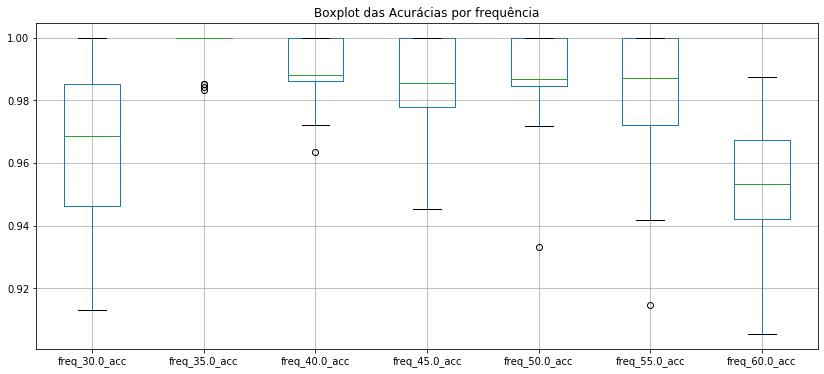

In [7]:
freq_accs.boxplot(figsize=(14, 6)).set(title='Boxplot das Acurácias por frequência')

freq_accs.describe()

In [8]:
freq_sups.style.hide_index()

freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
78,63,77,72,69,81,79
79,68,78,69,56,80,89
69,74,72,90,68,86,60
69,77,76,79,74,75,69
81,101,74,58,67,76,62
81,68,68,65,66,86,85
71,66,77,74,71,82,78
65,73,72,68,86,83,72
75,75,70,67,64,87,81
70,71,77,72,80,66,83


,freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
count,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,72.40000,73.933333,73.933333,70.966667,72.433333,79.033333,76.300000
std,5.21007,7.882470,6.522816,6.738890,6.765446,6.504552,9.078774
min,62.00000,60.000000,55.000000,58.000000,56.000000,66.000000,60.000000
25%,69.00000,69.250000,70.250000,66.000000,68.250000,75.000000,69.250000
50%,72.50000,73.000000,73.000000,69.000000,72.000000,79.000000,76.000000
75%,77.00000,77.750000,78.000000,74.750000,75.000000,83.000000,83.750000
max,81.00000,101.000000,84.000000,90.000000,86.000000,97.000000,96.000000


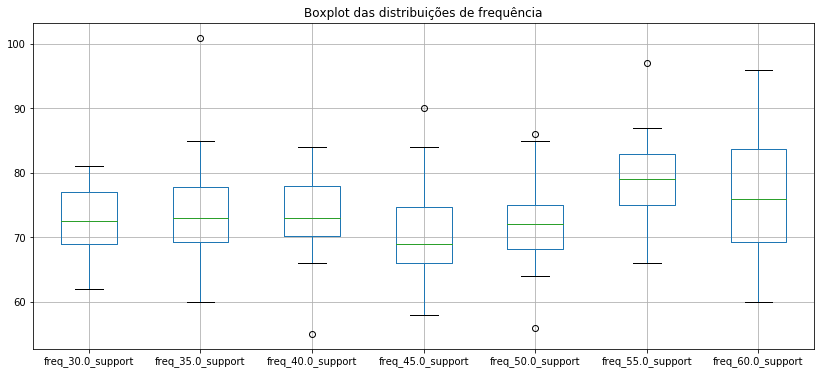

In [9]:
freq_sups.boxplot(figsize=(14, 6)).set(title='Boxplot das distribuições de frequência')

freq_sups.describe()